# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Step1:
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: data extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kuching
Processing Record 3 of Set 1 | bardai
Processing Record 4 of Set 1 | menongue
Processing Record 5 of Set 1 | kayangel
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | ocampo
Processing Record 8 of Set 1 | trumann
Processing Record 9 of Set 1 | okahandja
Processing Record 10 of Set 1 | cromer
Processing Record 11 of Set 1 | tosontsengel
Processing Record 12 of Set 1 | tumayr
Processing Record 13 of Set 1 | sirte
Processing Record 14 of Set 1 | alto barinas
Processing Record 15 of Set 1 | barra de santo antonio
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | vadso
Processing Record 18 of Set 1 | balnearia
Processing Record 19 of Set 1 | haiku-pauwela
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | santa teresa
Processing Record 22 of Set 1 | bethel
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,34.61,73,27,9.73,TF,1721517683
1,kuching,1.5500,110.3333,79.02,94,20,0.00,MY,1721517683
2,bardai,11.6500,7.2333,71.20,92,98,11.23,NG,1721517683
3,menongue,-14.6585,17.6910,52.05,22,2,1.72,AO,1721517683
4,kayangel,8.0823,134.7173,80.91,84,100,7.11,PW,1721517683


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,34.61,73,27,9.73,TF,1721517683
1,kuching,1.5500,110.3333,79.02,94,20,0.00,MY,1721517683
2,bardai,11.6500,7.2333,71.20,92,98,11.23,NG,1721517683
3,menongue,-14.6585,17.6910,52.05,22,2,1.72,AO,1721517683
4,kayangel,8.0823,134.7173,80.91,84,100,7.11,PW,1721517683


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

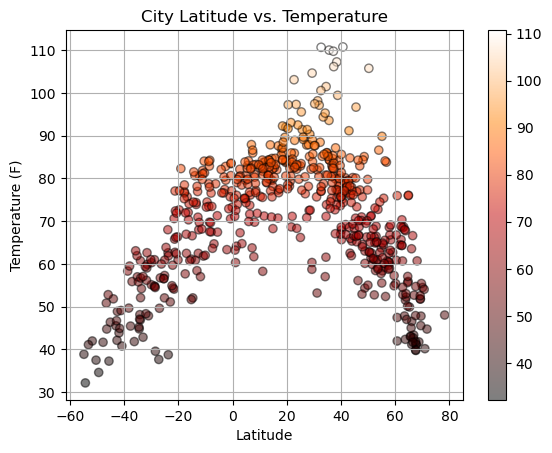

In [10]:
# Build scatter plot for latitude vs. temperature
import sys
import matplotlib

x = city_data_df["Lat"],
y = city_data_df["Max Temp"],
color_range= city_data_df["Max Temp"],

plt.scatter(x, y, c=color_range, cmap='gist_heat',
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.5
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("output_data/temperature_scatter.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

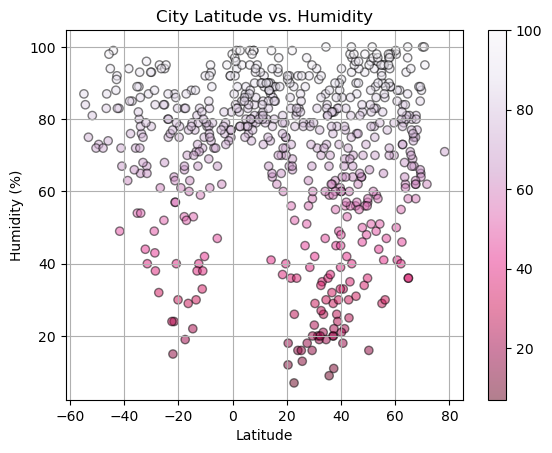

In [11]:
# Build the scatter plots for latitude vs. humidity

x = city_data_df["Lat"],
y = city_data_df["Humidity"],
color_range= city_data_df["Humidity"],

plt.scatter(x, y, c=color_range, cmap='PuRd_r',
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.5
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("output_data/humidity_scatter.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

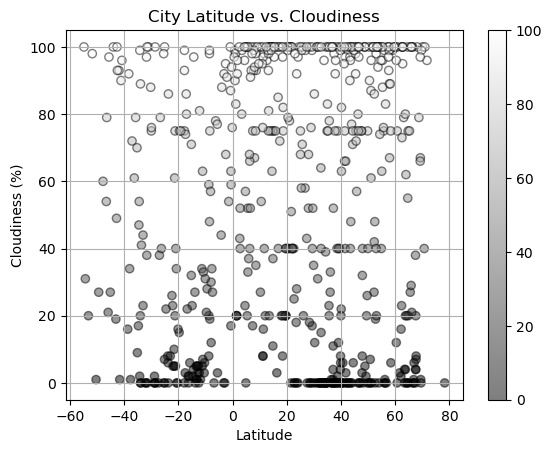

In [12]:
# Build the scatter plots for latitude vs. cloudiness

x = city_data_df["Lat"],
y = city_data_df["Cloudiness"],
color_range= city_data_df["Cloudiness"],

plt.scatter(x, y, c=color_range, cmap='gist_gray',
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.5
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("output_data/cloudiness_scatter.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

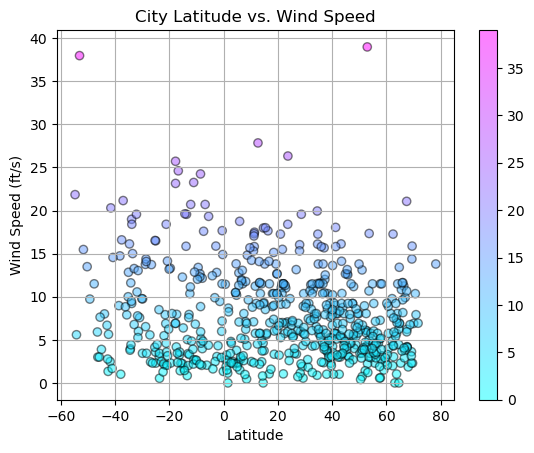

In [13]:
# Build the scatter plots for latitude vs. wind speed

x = city_data_df["Lat"],
y = city_data_df["Wind Speed"],
color_range= city_data_df["Wind Speed"],

plt.scatter(x, y, c=color_range, cmap='cool',
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.5
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (ft/s)")
plt.grid(True)
plt.colorbar()

# Save the figure
plt.savefig("output_data/wind_speed_scatter.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kuching,1.5500,110.3333,79.02,94,20,0.00,MY,1721517683
2,bardai,11.6500,7.2333,71.20,92,98,11.23,NG,1721517683
4,kayangel,8.0823,134.7173,80.91,84,100,7.11,PW,1721517683
6,ocampo,21.6500,-101.5000,68.65,56,100,15.50,MX,1721517683
7,trumann,35.6737,-90.5073,84.31,59,78,5.66,US,1721517683


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,34.61,73,27,9.73,TF,1721517683
3,menongue,-14.6585,17.6910,52.05,22,2,1.72,AO,1721517683
5,puerto natales,-51.7236,-72.4875,41.97,81,98,15.48,CL,1721517683
8,okahandja,-21.9833,16.9167,54.37,15,5,5.48,NaN,1721517684
14,barra de santo antonio,-9.4047,-35.5072,74.48,78,28,13.40,BR,1721517684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.34850827967945563


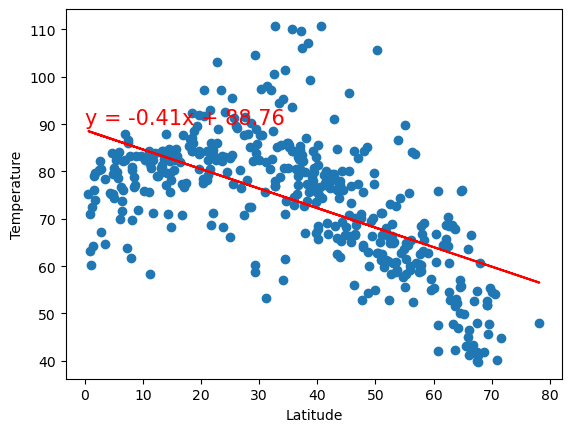

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Temperature", (0, 90))

The r-value is: 0.6824743842314981


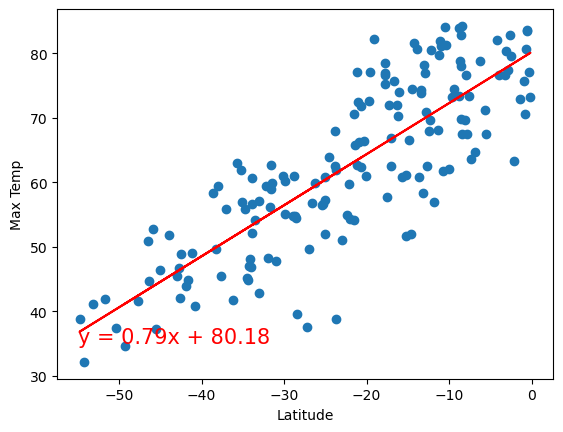

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature for northern hemisphere. For southern hemisphere is a moderate correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008884358627536426


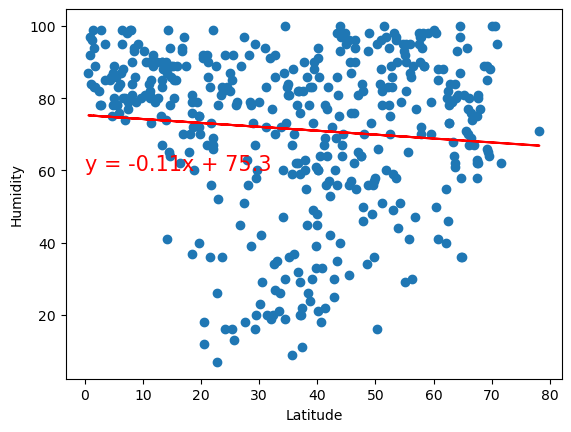

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(0,60))

The r-value is: 0.010694637338967042


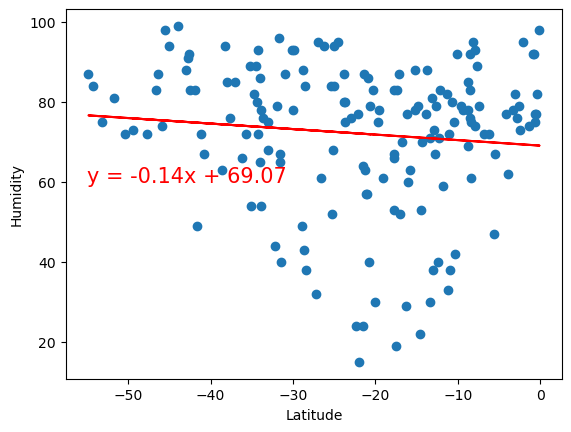

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 60))

**Discussion about the linear relationship:** There is no correlation for both norther or southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008884358627536426


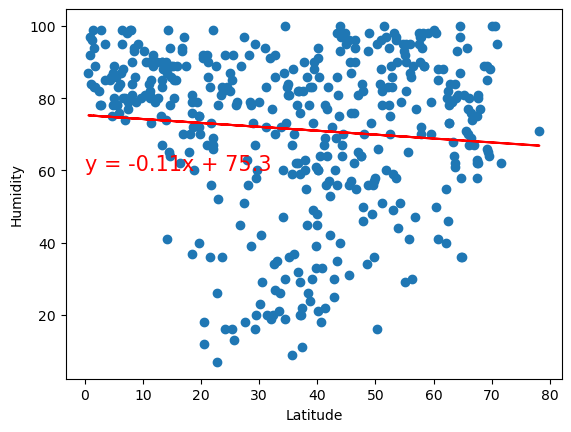

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (0, 60))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 60))

**Discussion about the linear relationship:** There is no correlation for both norther or southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01372922118395994


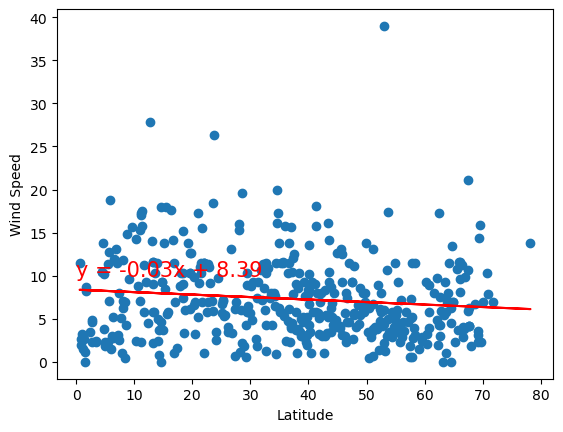

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,10))

The r-value is: 0.011665317075789794


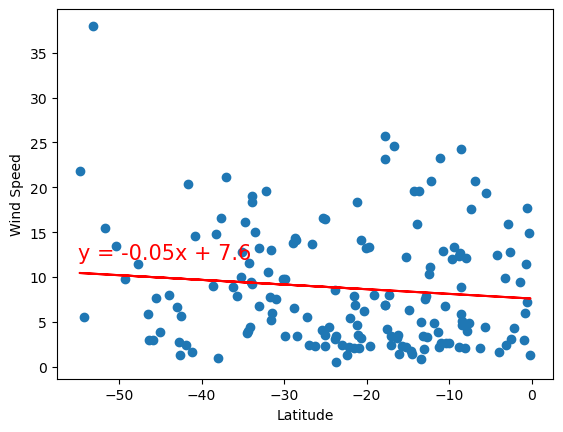

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55, 12))

**Discussion about the linear relationship:** There is no correlation for both norther or southern hemispheres.